# Linking Writing Processes to Writing Quality

By: David Hartsman

<hr style="border: 4px solid black">

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Data Dictionary/Reference:
File and Field Information
train_logs.csv - Input logs to be used as training data. To prevent reproduction of the essay text, all alphanumeric character inputs have been replaced with the "anonymous" character q; punctuation and other special characters have not been anonymized.

- id - The unique ID of the essay
- event_id - The index of the event, ordered chronologically
- down_time - The time of the down event in milliseconds
- up_time - The time of the up event in milliseconds
- action_time - The duration of the event (the difference between down_time and up_time)
- activity - The category of activity which the event belongs to
- Nonproduction - The event does not alter the text in any way
- Input - The event adds text to the essay
- Remove/Cut - The event removes text from the essay
- Paste - The event changes the text through a paste input
- Replace - The event replaces a section of text with another string
- Move From [x1, y1] To [x2, y2] - The event moves a section of text spanning character index x1, y1 to a new location x2, y2
- down_event - The name of the event when the key/mouse is pressed
- up_event - The name of the event when the key/mouse is released
- text_change - The text that changed as a result of the event (if any)
- cursor_position - The character index of the text cursor after the event
- word_count - The word count of the essay after the event


Note that there may be events in the test set that do not occur in the training set. Your solution should be robust to unseen events.

Note: Key_down and key_up events may not necessarily occur in the same order as they are presented in the dataset. To illustrate, a writer may press down "a" and then press down "b" before he/she even releases "a". However, all the keystroke information about "a" comes before "b" in the dataframe.

test_logs.csv - Input logs to be used as test data. Contains the same fields as train_logs.csv. The logs available in the public version of this file are only examples to illustrate the format.
train_scores.csv
id - The unique ID of the essay
score - The score the essay received out of 6 (the prediction target for the competition)
sample_submission.csv - A submission file in the correct format. See the Evaluation page for details.

#### Data loading

In [2]:
df = pd.read_csv('/Users/samalainabayeva/Desktop/FLAT_IRON!!!/writing_quality/linking-writing-processes-to-writing-quality/train_logs.csv')

In [3]:
df.head()

,id,event_id,down_time,up_time,action_time,activity,down_event,up_event,text_change,cursor_position,word_count
0,001519c8,1,4526,4557,31,Nonproduction,Leftclick,Leftclick,NoChange,0,0
1,001519c8,2,4558,4962,404,Nonproduction,Leftclick,Leftclick,NoChange,0,0
2,001519c8,3,106571,106571,0,Nonproduction,Shift,Shift,NoChange,0,0
3,001519c8,4,106686,106777,91,Input,q,q,q,1,1
4,001519c8,5,107196,107323,127,Input,q,q,q,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8405898 entries, 0 to 8405897
Data columns (total 11 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   id               object
 1   event_id         int64 
 2   down_time        int64 
 3   up_time          int64 
 4   action_time      int64 
 5   activity         object
 6   down_event       object
 7   up_event         object
 8   text_change      object
 9   cursor_position  int64 
 10  word_count       int64 
dtypes: int64(6), object(5)
memory usage: 705.5+ MB


In [5]:
df.shape

(8405898, 11)

In [6]:
df["id"].duplicated().sum()

8403427

In [7]:
# corresponds to the number of labels we have for the data, so a lot of data needs to be aggregated

df.shape[0] - df["id"].duplicated().sum()

2471

#### Labels: EDA

In [8]:
grades = pd.read_csv('/Users/samalainabayeva/Desktop/FLAT_IRON!!!/writing_quality/linking-writing-processes-to-writing-quality/train_scores.csv')

In [9]:
grades

,id,score
0,001519c8,3.5
1,0022f953,3.5
2,0042269b,6.0
3,0059420b,2.0
4,0075873a,4.0
...,...,...
2466,ffb8c745,3.5
2467,ffbef7e5,4.0
2468,ffccd6fd,1.5
2469,ffec5b38,5.0


/Users/samalainabayeva/anaconda3/envs/david_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/samalainabayeva/anaconda3/envs/david_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


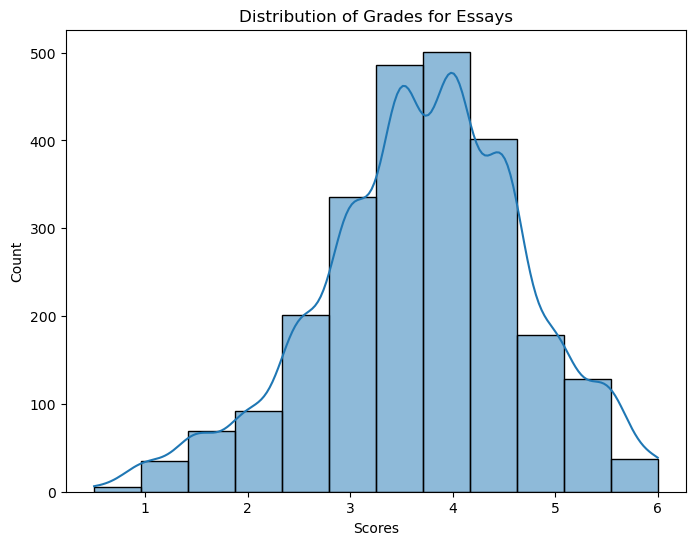

In [42]:
fig, ax = plt.subplots(figsize=(8,6))
sns.histplot(data=grades, x='score', ax=ax, kde=True, bins=12)
ax.set_title("Distribution of Grades for Essays")
ax.set_xlabel("Scores");

/Users/samalainabayeva/anaconda3/envs/david_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/samalainabayeva/anaconda3/envs/david_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


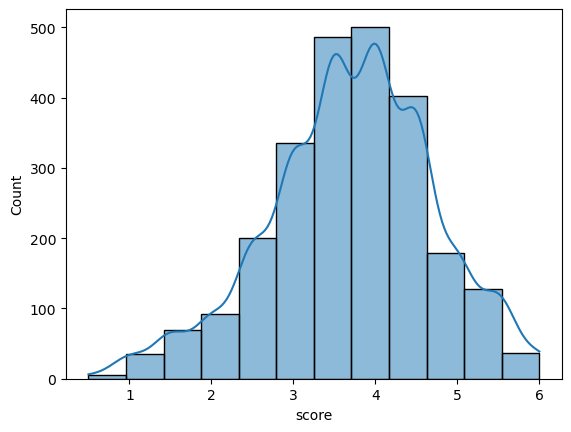

In [46]:
# Create a custom color palette
custom_palette = sns.color_palette("husl", 8)

# Plot histogram with the custom palette
sns.histplot(data=grades, x='score', kde=True, bins=12, cbar='viridis')

# Show the plot
plt.show()

In [80]:
grades['score'].value_counts().sort_index()

score
0.5      5
1.0     35
1.5     69
2.0     92
2.5    201
3.0    336
3.5    486
4.0    501
4.5    402
5.0    179
5.5    128
6.0     37
Name: count, dtype: int64

In [57]:
grades['score'].value_counts().shape

(12,)

/Users/samalainabayeva/anaconda3/envs/david_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/samalainabayeva/anaconda3/envs/david_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/samalainabayeva/anaconda3/envs/david_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


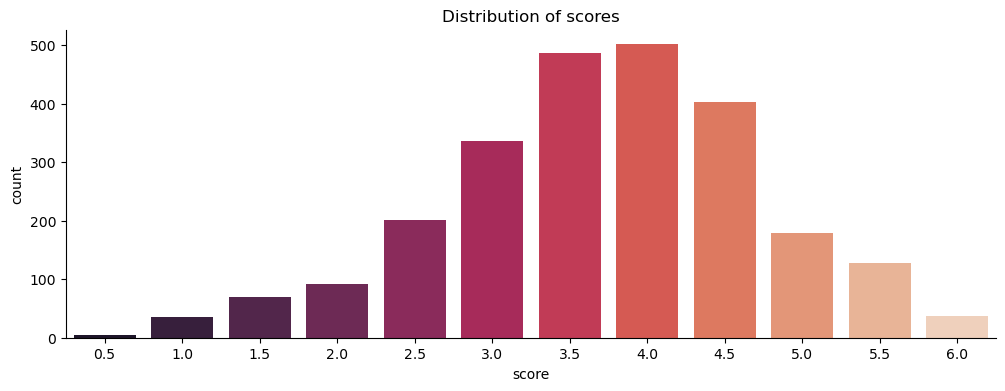

In [35]:
f, ax = plt.subplots(figsize=(12, 4))

# purely aesthetic -> removes right hand spine of the chart, leaving a borderless white space
sns.despine()

# countplot shows the counts of occurences within a categorical feature, so given that these scores are discrete and
# not continuous, the countplot might be preferable to the histplot, however as shown above, i tidied it up by 
# tailoring the number of bins to = 12, the same number of discrete score values
ax = sns.countplot(data=grades,
                   x="score", palette='rocket')

ax.set_title("Distribution of scores");

### Begin Group-By transformations
'id' will be the value we 'groupby' to create a new data frame

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8405898 entries, 0 to 8405897
Data columns (total 11 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   id               object
 1   event_id         int64 
 2   down_time        int64 
 3   up_time          int64 
 4   action_time      int64 
 5   activity         object
 6   down_event       object
 7   up_event         object
 8   text_change      object
 9   cursor_position  int64 
 10  word_count       int64 
dtypes: int64(6), object(5)
memory usage: 705.5+ MB


In [59]:
df.columns

Index(['id', 'event_id', 'down_time', 'up_time', 'action_time', 'activity',
       'down_event', 'up_event', 'text_change', 'cursor_position',
       'word_count'],
      dtype='object')

In [69]:
df.loc[df['id'] == '001519c8', 'down_time'].max()/1000/60

30.03128333333333

In [72]:
pivot = df.pivot_table(values=['event_id', 'down_time', 'up_time', 'action_time','cursor_position',
       'word_count'], index='id', aggfunc=['max'])
pivot

max                                                       
         action_time cursor_position down_time event_id  up_time word_count
id                                                                         
001519c8        2259            1539   1801877     2557  1801969        256
0022f953        1758            1676   1788842     2454  1788969        323
0042269b        3005            2291   1771219     4136  1771669        404
0059420b         806            1047   1404394     1556  1404469        206
0075873a         701            1402   1662390     2531  1662472        252
...              ...             ...       ...      ...      ...        ...
ffb8c745        3323            1634   1791581     4739  1791649        461
ffbef7e5        1144            1877   1799124     2604  1799174        438
ffccd6fd         564            2761   1959273     3063  1959363        201
ffec5b38        1388            2133   1508335     3242  1508504        413
fff05981        1915            1496   2070065     3619  2070133        241

[2471 rows x 6 columns]

In [83]:
pivot.columns = pivot.columns.droplevel(level=0)

In [85]:
pivot.describe()

,action_time,cursor_position,down_time,event_id,up_time,word_count
count,2471.000000,2471.000000,2.471000e+03,2471.000000,2.471000e+03,2471.000000
mean,2989.163497,2232.188183,1.769341e+06,3401.820316,1.769537e+06,389.966410
std,13084.145614,969.507385,2.760367e+05,1578.850387,2.760283e+05,172.455317
min,153.000000,207.000000,2.294520e+05,262.000000,2.295480e+05,35.000000
25%,515.000000,1487.500000,1.754688e+06,2193.500000,1.754901e+06,255.000000
50%,1278.000000,1993.000000,1.792237e+06,3082.000000,1.792315e+06,351.000000
75%,2648.500000,2758.500000,1.807522e+06,4301.000000,1.807774e+06,480.000000
max,447470.000000,7802.000000,8.313630e+06,12876.000000,8.313707e+06,1326.000000


In [92]:
# Just an interesting exploration of fact

pivot[pivot['action_time'] == (abs(pivot["down_time"] - pivot['up_time']))]

,action_time,cursor_position,down_time,event_id,up_time,word_count
id,,,,,,
0ad15907,691,1681,1776290,1959,1776981,306
0ad30c56,3357,3010,1761927,5622,1765284,554
0fa3f386,2571,1522,1803458,1840,1806029,235
10989e65,1972,2058,1750552,3207,1752524,389
2dc069c3,51518,2756,1751011,3964,1802529,519
315bdafd,5157,876,1205278,1379,1210435,201
4c973b64,6772,3915,1793944,5766,1800716,676
56586ecf,34320,2736,1634575,3168,1668895,485
610914b9,1730,1878,1781749,2445,1783479,318


<hr style="border: 4px solid GOLD">

# To-Dos:
- cursor position - how do we make this meaningful?
- 'down_event', 'up_event', 'text_change' - create counts of the different dummies/OHE values

<hr style="border: 4px solid GOLD">

In [98]:
df["text_change"].unique()[20:100]

array(['\n ', 'qqqqqq => q',
       'qqqqqqq qqq qqqq qqqq qqqq qq qqqqqqqq qqqqqqq  => q',
       'qqqqqqq  => q', 'qqqqq qqq qqqq qq ',
       'qqq qq qqq qqqqqqq qqqqqq qqqq qq  => q',
       'qqq qqqqq qq qqqqqqqq qqqq qqq qqqqqqq qq qqqqq qqqqq qqqqqq => q',
       'qqqqqqq, qqqq qqqqq qqqqqq qqq qqqq qqqq qqqq qqqq qqqq qqqqqqq qqqq qqq qq qqqqqq qqqq qqqq qqq qqqqqq qqqqqq qq qqq qqq qqqqqqqq qqqqq qqqq qqqq qqq ',
       'qqq qqqqqq qq qqqqq qqqqqq  => q',
       'qqqqqqqqq qqqqq qqqqq qqq qqqqq qq qqqqqqqqqq qqqq qqqqqqq qqqqqqqqq qqqqqqq, q => q',
       '=', 'qq qq qqqqq qqqq qqqqqqqqq\n',
       'qqqqqqq qqqqqqqqq qqqq qqq qq qqqq qqq qqqqqqqqq => q',
       'qqqqqqqqqqq  => =', 'qqqqqqqqqqq ', '/', 'qq => q', 'qqq => q',
       'qqqqq => q', 'qqqq', '\n => q', ':',
       'qqqqq qq qq qqqqqqqqq - qq qqq qqqqqqqqqq - qq qqqqqq qqqq qqqqqqqq',
       'qqqqqqq qq qqqq qqqqq qqqq qqqqq, qqqqqq qqqq qqqq => q',
       'qqqqq qq qqqqq qqq qqqqqqqq qqqqqq qqq qqqqq, qqq qqqqqqqq 

In [93]:
pd.get_dummies(df[['down_event', 'up_event', 'text_change']])

,down_event_!,"down_event_""",down_event_#,down_event_$,down_event_%,down_event_&,down_event_',down_event_(,down_event_),down_event_*,...,text_change_,text_change_¡,text_change_·,text_change_¿,text_change_Â´,text_change_Ä±,text_change_Å,text_change_Ë,text_change_â,text_change_ä
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8405893,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8405894,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8405895,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8405896,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
'id', 'event_id', 'down_time', 'up_time', 'action_time', 'activity',
       'down_event', 'up_event', 'text_change', 'cursor_position',
       'word_count'

In [60]:
df['down_time']

0             4526
1             4558
2           106571
3           106686
4           107196
            ...   
8405893    2063944
8405894    2064497
8405895    2064657
8405896    2069186
8405897    2070065
Name: down_time, Length: 8405898, dtype: int64

In [88]:
df["activity"].unique()

array(['Nonproduction', 'Input', 'Remove/Cut', 'Replace',
       'Move From [284, 292] To [282, 290]',
       'Move From [287, 289] To [285, 287]',
       'Move From [460, 461] To [465, 466]', 'Paste',
       'Move From [905, 1314] To [907, 1316]',
       'Move From [565, 743] To [669, 847]',
       'Move From [669, 847] To [565, 743]',
       'Move From [1041, 1121] To [1496, 1576]',
       'Move From [1455, 1557] To [1323, 1425]',
       'Move From [2268, 2275] To [2247, 2254]',
       'Move From [213, 302] To [902, 991]',
       'Move From [0, 158] To [234, 392]',
       'Move From [460, 465] To [925, 930]',
       'Move From [810, 906] To [816, 912]',
       'Move From [186, 187] To [184, 185]',
       'Move From [140, 272] To [299, 431]',
       'Move From [114, 140] To [272, 298]',
       'Move From [1386, 1450] To [1445, 1509]',
       'Move From [442, 524] To [296, 378]',
       'Move From [408, 414] To [390, 396]',
       'Move From [1144, 1147] To [1142, 1145]',
       'Move 

In [30]:
print('The average of the number of events per essay in the test dataset is : ' + str(df.groupby("id").max(numeric_only=True)["event_id"].mean().round(0)))

The average of the number of events per essay in the test dataset is : 3402.0


In [49]:
df.groupby("id").max(numeric_only=True)["event_id"].mean().round(0)

3402.0

In [53]:
df.groupby('id')["event_id"].max().mean().round(0)

3402.0

In [36]:
df.loc[df['id'] == '001519c8']["down_event"].unique()

array(['Leftclick', 'Shift', 'q', 'Space', 'Backspace', '.', ',', 'Enter',
       'ArrowLeft', "'", ';', 'ArrowRight'], dtype=object)

In [24]:
df.loc[df['id'] == '001519c8', 'event_id'].max()

2557

In [25]:
1279*2

2558

In [29]:
df.loc[df['id'] == '001519c8', 'event_id'].sum() / (df.loc[df['id'] == '001519c8', 'event_id'].shape[0])

1279.0

In [26]:
df.loc[df['id'] == '001519c8', 'event_id']

0          1
1          2
2          3
3          4
4          5
        ... 
2552    2553
2553    2554
2554    2555
2555    2556
2556    2557
Name: event_id, Length: 2557, dtype: int64

In [9]:
df['id']

0          001519c8
1          001519c8
2          001519c8
3          001519c8
4          001519c8
             ...   
8405893    fff05981
8405894    fff05981
8405895    fff05981
8405896    fff05981
8405897    fff05981
Name: id, Length: 8405898, dtype: object

In [11]:
df[df['id'] == '001519c8']

,id,event_id,down_time,up_time,action_time,activity,down_event,up_event,text_change,cursor_position,word_count
0,001519c8,1,4526,4557,31,Nonproduction,Leftclick,Leftclick,NoChange,0,0
1,001519c8,2,4558,4962,404,Nonproduction,Leftclick,Leftclick,NoChange,0,0
2,001519c8,3,106571,106571,0,Nonproduction,Shift,Shift,NoChange,0,0
3,001519c8,4,106686,106777,91,Input,q,q,q,1,1
4,001519c8,5,107196,107323,127,Input,q,q,q,2,1
...,...,...,...,...,...,...,...,...,...,...,...
2552,001519c8,2553,1781786,1781841,55,Remove/Cut,Backspace,Backspace,q,555,255
2553,001519c8,2554,1781917,1781991,74,Remove/Cut,Backspace,Backspace,q,554,255
2554,001519c8,2555,1782062,1782141,79,Remove/Cut,Backspace,Backspace,q,553,255
2555,001519c8,2556,1782922,1782985,63,Input,q,q,q,554,255


In [ ]:
df